In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [144]:
train = pd.read_csv('train.csv', low_memory=False)

In [42]:
test = pd.read_csv('test.csv', low_memory=False)

In [9]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [10]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
len(train.Store.unique())

1115

In [145]:
train.Date = pd.to_datetime(train.Date)

In [146]:
train = train.sort_values('Date')

In [147]:
train = train.reset_index(drop=True)

In [21]:
train.groupby(['Date']).agg({'Sales': sum}).plot.line()
plt.show()

In [46]:
## are all stores on each day?
## are there days with no observations??
## is it possible to drop 0 values??
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [44]:
test.Store.shape

(41088,)

In [57]:
stores = pd.read_csv('store.csv')

In [61]:
stores.shape

(1115, 10)

In [65]:
len(stores.Store.unique())

1115

In [149]:
train = train[train.Open==1]

In [150]:
train.shape

(844392, 9)

In [74]:
store353 = train[train.Store == 353]
store353.index = store353.Date

In [78]:
%matplotlib inline

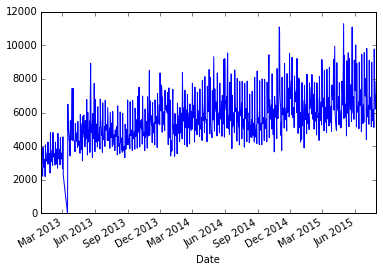

In [79]:
store353.Sales.plot.line()

In [83]:
store353[store353.Sales == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,,
2013-03-16,353,6,2013-03-16,0,0,1,0,0,0


In [88]:
len(train[train.Sales == 0].Store.unique())

41

In [92]:
train = train[train.Sales != 0]

### what will we be predicting??

In [97]:
# 48 predictions per store
test.Open.value_counts()

1    35093
0     5984
Name: Open, dtype: int64

In [56]:
# how many predictions need to be made for each store??
## 48 per store
test.groupby('Store').agg({'Id': lambda x: len(x.unique())}).Id.unique()

array([48])

In [45]:
len(test.Store.unique())

856

In [98]:
train.Date.max()

Timestamp('2015-07-31 00:00:00')

In [99]:
test.Date.max()

'2015-09-17'

In [100]:
test.Date.min()

'2015-08-01'

### some exploration

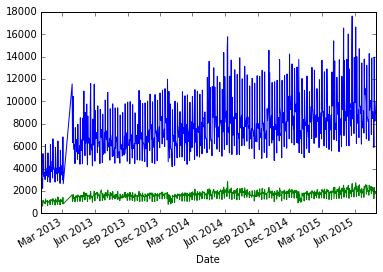

In [127]:
indv = train[train.Store == train.Store.unique()[13]].sort_values('Date').reset_index(drop=True)
indv.index = indv.Date
indv.Sales.plot.line()
indv.Customers.plot.line()

In [130]:
indv_test = indv[indv.index >= pd.datetime(2015,6,1)]

In [131]:
indv_train = indv[((indv.index >= pd.datetime(2013,5,1)) & (indv.index < pd.datetime(2015,6,1)))]

In [142]:
indv_train.Sales.reset_index(drop=True).plot()
plt.show()